In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

comments = pd.read_csv("User_Comments.csv")[["CONTENT","CLASS"]]


In [36]:
comments


,CONTENT,CLASS
0,Since when has Katy Perry had her own YouTube ...,0
1,Sub my channel!﻿,1
2,ILove shakira ﻿,0
3,How did THIS Video in all of YouTube get this ...,0
4,Katy Perry - Roar (Official): http://youtu.be/...,0
5,Where did she find all that make up in a freak...,0
6,Check out this video on YouTube:﻿,1
7,Why dafuq is a Korean song so big in the USA. ...,0
8,5 years soon!﻿,0
9,this video is great .....!!! I love this.........,0


In [37]:
from sklearn.model_selection import train_test_split
X = comments["CONTENT"]
y = comments["CLASS"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [4]:
len(X_train)


940

In [5]:
len(X_test)

235

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = X_train.tolist() + X_test.tolist()
vectorizer = CountVectorizer(ngram_range=(1, 2))
count = vectorizer.fit_transform(corpus)
# count.toarray()

In [7]:
print(vectorizer.get_stop_words())

None


In [8]:
len(vectorizer.get_feature_names())

10138

In [9]:
len(vectorizer.get_feature_names())*0.03
# 取第304名以后的

304.14

In [10]:
# 求 Remove the top 3% of frequently occurring words 的方法1
max_indexs = np.sum(count.toarray(),axis = 0).argsort()[::-1][304]
max_indexs

5238

In [11]:
fre_3 = count.toarray()[:,max_indexs].sum()/len(count.toarray())
fre_3
#  TfidfVectorizer( max_features = 500,min_df = 2, ngram_range=(1, 2),max_df = fre_3, stop_words = "english"）

0.007659574468085106

In [12]:
#Remove the top 3% of frequently occurring words 的方法2
stop_high_frequence = []
stop_indexs = np.sum(count.toarray(),axis = 0).argsort()[::-1][:max_indexs]

for index in stop_indexs:
    stop_high_frequence.append(vectorizer.get_feature_names()[index])

stop_indexs

array([8573, 8271, 8737, ..., 2872,  764, 2871])

In [13]:
stop_high_frequence

['this',
 'the',
 'to',
 'is',
 'song',
 'and',
 'you',
 'it',
 'my',
 'love',
 'of',
 'br',
 'video',
 'in',
 'on',
 'like',
 'this song',
 'check',
 'out',
 'so',
 'for',
 'that',
 'views',
 'check out',
 '39',
 'me',
 'youtube',
 'if',
 'this video',
 'katy',
 'she',
 'com',
 'br br',
 'best',
 'are',
 'just',
 'have',
 'music',
 'can',
 'subscribe',
 'be',
 'but',
 'your',
 'billion',
 'good',
 'perry',
 'love this',
 'please',
 'http',
 'on youtube',
 'get',
 'people',
 'was',
 'katy perry',
 'with',
 'www',
 'all',
 'if you',
 'shakira',
 'out this',
 'much',
 'channel',
 'who',
 'not',
 'will',
 'her',
 'from',
 'at',
 'how',
 'when',
 'we',
 'world',
 'video on',
 '000',
 'up',
 'only',
 'there',
 'amp',
 'in the',
 'because',
 'don',
 'this is',
 'ever',
 'still',
 'has',
 'one',
 'my channel',
 'eminem',
 'billion views',
 'old',
 'or',
 'out my',
 'lt',
 '2015',
 'of the',
 'am',
 'new',
 'awesome',
 'do',
 'like this',
 'time',
 'an',
 'the best',
 'what',
 'she is',
 'why'

In [14]:
from sklearn.feature_extraction import text 
my_stop_words = text.ENGLISH_STOP_WORDS.union(stop_high_frequence)


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

#vectorizer = TfidfVectorizer( max_features = 500,min_df = 2, stop_words = my_stop_words)
vectorizer = TfidfVectorizer( max_features = 500,ngram_range=(1, 3),min_df = 2, max_df = 0.97,stop_words = "english")
                             #fre_3,)
bow = vectorizer.fit_transform(corpus)
bow.shape

(1175, 500)

In [39]:
print(vectorizer.get_feature_names())

['000', '000 000', '000 views', '100', '2014', '2015', '25', '2billion', '39', '39 understand', '39 watching', '4netjobs', '4netjobs com', '666', 'actually', 'adf', 'adf ly', 'africa', 'african', 'ago', 'amazing', 'american', 'amp', 'animal', 'animals', 'anthem', 'appreciate', 'artist', 'awesome', 'baby', 'bad', 'beautiful', 'beautiful song', 'believe', 'bennett', 'best', 'best song', 'best songs', 'better', 'big', 'big fan', 'billion', 'billion views', 'birthday', 'bit', 'black', 'boy', 'br', 'br br', 'br href', 'buy', 'called', 'came', 'came check', 'cevxzvsjlk8', 'champion', 'chance', 'channel', 'channel subscribe', 'charlie', 'charlie lost', 'check', 'check channel', 'check new', 'check playlist', 'check video', 'check views', 'checking', 'click', 'close', 'com', 'com ref', 'com watch', 'come', 'comes', 'coming', 'comment', 'comments', 'completely', 'cool', 'cover', 'crazy', 'cup', 'cup song', 'cute', 'damn', 'dance', 'day', 'did', 'didn', 'dislike', 'does', 'doesn', 'doing', 'don'

In [17]:
bow

<1175x500 sparse matrix of type '<class 'numpy.float64'>'
	with 2076 stored elements in Compressed Sparse Row format>

In [18]:
bow_train = bow[:len(X_train)]
bow_train.shape

(940, 500)

In [19]:
bow_test = bow[-len(X_test):]
bow_test.shape

(235, 500)

(b)

In [20]:
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import time


param_grid = {'n_estimators': np.arange(1,200,10),
             'max_depth':range(1,150,10),'min_samples_split':range(2,20,2)}


clf_cv = GridSearchCV(ensemble.RandomForestClassifier(class_weight = 'balanced',n_jobs = -1,random_state = 0), param_grid, cv = 5,n_jobs = -1)
print("Running....")
tic = time.time()
clf_cv.fit(bow_train, y_train)

toc = time.time()
print("Training time: {0}s".format(toc - tic))

#clf_cv.cv_results_, 


Running....
Training time: 1584.4798662662506s


In [21]:
clf_cv.best_params_, clf_cv.best_score_

({'max_depth': 31, 'min_samples_split': 2, 'n_estimators': 101},
 0.8776595744680851)

In [22]:
# param_grid = {'max_depth':range(1,150,10),'min_samples_split':range(2,20,2)}

# clf_cv = GridSearchCV(ensemble.RandomForestClassifier(class_weight = 'balanced',n_jobs = -1, n_estimators = 120,random_state = 0), param_grid, cv = 5,n_jobs = -1)
# print("Running....")
# tic = time.time()
# clf_cv.fit(bow_train, y_train)

# toc = time.time()
# print("Training time: {0}s".format(toc - tic))

In [23]:
# clf_cv.best_params_, clf_cv.best_score_

In [24]:
#param_grid = {'min_samples_split':range(2,20,1)}

In [25]:
clf = clf_cv.best_estimator_
clf

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=31, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=101, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [26]:
y_pred = clf.predict(bow_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      1.00      0.94       191
           1       1.00      0.45      0.62        44

   micro avg       0.90      0.90      0.90       235
   macro avg       0.94      0.73      0.78       235
weighted avg       0.91      0.90      0.88       235

[[191   0]
 [ 24  20]]


In [27]:
#(C)
param_grid = {'n_estimators': np.arange(1,200,1)}


clf_cv2 = GridSearchCV(ensemble.RandomForestClassifier(class_weight = 'balanced',n_jobs = -1,max_depth=41,min_samples_split=2,random_state = 0), param_grid, cv = 5,n_jobs = -1)
print("Running....")
tic = time.time()
clf_cv2.fit(bow_train, y_train)

toc = time.time()
print("Training time: {0}s".format(toc - tic))




Running....
Training time: 116.72989797592163s


In [28]:
clf_cv2.best_params_, clf_cv.best_score_

({'n_estimators': 196}, 0.8776595744680851)

In [29]:
clf_cv2.cv_results_

/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/apple/anaconda3/lib/pyth

{'mean_fit_time': array([0.10847106, 0.10654907, 0.10806336, 0.10980721, 0.10855231,
        0.11150784, 0.11050467, 0.11132312, 0.11429334, 0.11660614,
        0.11289725, 0.11302176, 0.11818399, 0.11135483, 0.11314497,
        0.11180911, 0.1149899 , 0.1149117 , 0.11812568, 0.11715603,
        0.11594658, 0.11940508, 0.11812205, 0.11995521, 0.1214016 ,
        0.12212162, 0.12715111, 0.12166452, 0.12299805, 0.12104006,
        0.1231462 , 0.12511244, 0.12211905, 0.12360883, 0.12525201,
        0.12265687, 0.12054267, 0.12310786, 0.12657852, 0.13010941,
        0.12279344, 0.12518353, 0.12598953, 0.12524414, 0.12617836,
        0.13431206, 0.13371377, 0.1336823 , 0.13060112, 0.13249254,
        0.13429685, 0.1374898 , 0.12738214, 0.1241374 , 0.12631326,
        0.12852478, 0.12917781, 0.13081374, 0.13861761, 0.13215113,
        0.1409049 , 0.13250952, 0.13091254, 0.13714528, 0.13934975,
        0.13896713, 0.13541179, 0.16681476, 0.16001496, 0.133569  ,
        0.13319802, 0.13407035,

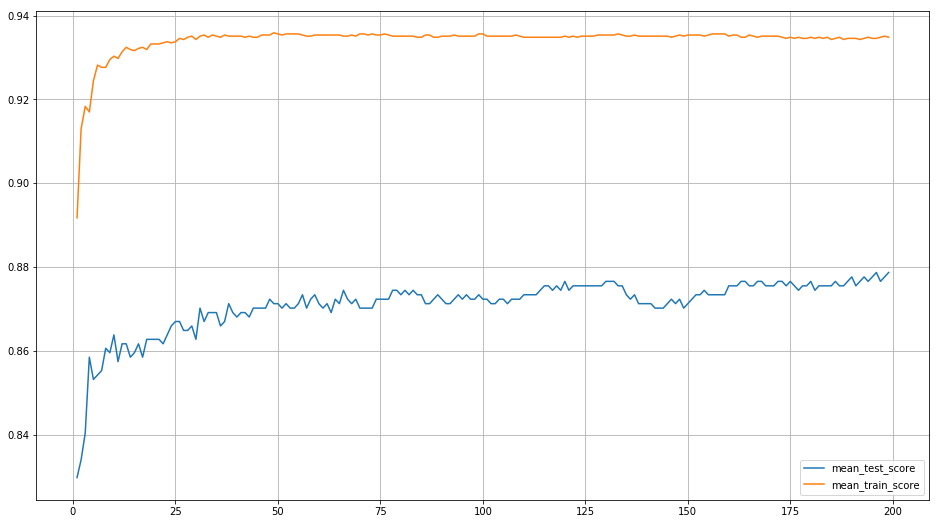

In [31]:
scores_test_mean = clf_cv2.cv_results_['mean_test_score']
scores_train_mean = clf_cv2.cv_results_['mean_train_score']


plt.figure(figsize=(16,9))
plt.plot(np.arange(1,200),scores_test_mean, label = "mean_test_score")
plt.plot(np.arange(1,200),scores_train_mean, label = "mean_train_score")
plt.legend()
plt.grid()


In [32]:
import sklearn
help(sklearn.tree._tree.Tree)

Help on class Tree in module sklearn.tree._tree:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : int
 |      The maximal depth of the tree.
 |  
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child of node i.
 |      For leaves,

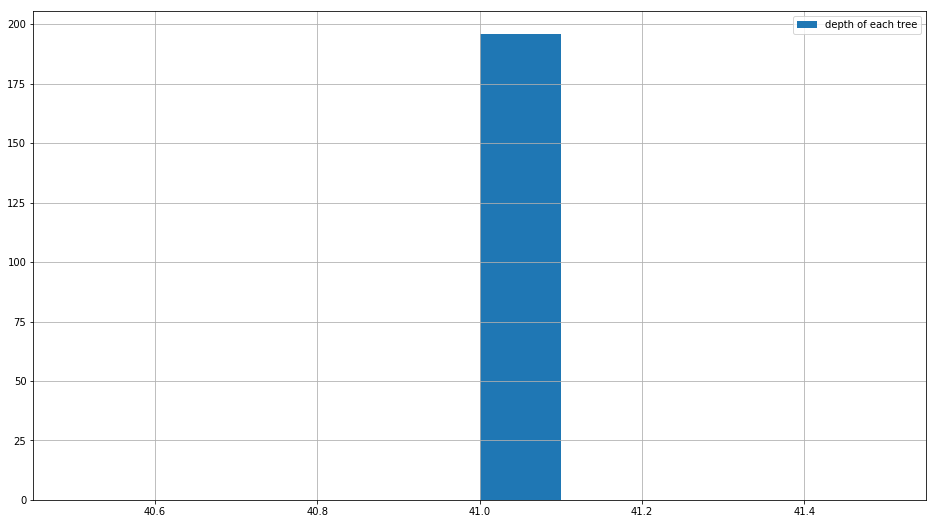

In [33]:
#(d)
best_est = clf_cv2.best_estimator_
best_est.fit(bow_train, y_train)

depth = [estimator.tree_.max_depth for estimator in best_est.estimators_]

plt.figure(figsize=(16,9))
plt.hist(depth, label = "depth of each tree")
plt.legend()
plt.grid()

In [34]:
#(e)

index_important = best_est.feature_importances_.argsort()[::-1][:10]

important_features = []
for index in index_important:
    important_features.append(vectorizer.get_feature_names()[index])
important_features

['like comment',
 'check channel',
 'facebook com',
 'share',
 'subscribers',
 'cover',
 'follow',
 'www facebook',
 'll',
 'google']